# **Ridge Regression (Theory)**

---
Fittinng a ridge regression model with regularization $\lambda > 0$ and data vector $Y \in R^{N,p}$ is equivalent to finding $\beta_{*} \in R^{p}$ that minimizes 
\begin{equation*}
L(\beta) = \frac{1}{2}\|Y-X\beta\|_{2}^{2}+\lambda\|\beta\|_{2}^{2} 
\end{equation*}



1.   Compute the gradient of the function $L(\beta)$.
2. Show that 
\begin{equation*}
\min_{\beta} \|Y-X\beta\|_{2}^{2} + \frac{\lambda}{2}\|\beta\|_{2}^{2}
\end{equation*}
is a convex optimization problem 
3.   Find a formula for $\beta_{*}$. 

1. From DSA3102, for $f(x) = \|Ax-b\|_{2}^{2}$, we ahve that 
\begin{equation*}
\nabla f(x) = 2A^{T}(Ax-b) 
\end{equation*}
Similarly, since $g(\beta) = \|Y-X\beta\|_{2}^{2} = \|X\beta-Y\|_{2}^{2}$, 
\begin{equation*}
\nabla L(\beta) = X^{T}(X\beta -Y) + 2\lambda \beta 
\end{equation*}


2. It is sufficient to show that $L(\beta)$ is convex. We first show that $\|\beta\|_{2}^{2}$ is convex. Let $f(z) = \|z\|_{2},z \in R^{d}$. Suppose $w = \lambda x + (1-\lambda)y$ where $\lambda \in [0,1],x,y \in R^{d}$. Then, 
\begin{equation*}
f(w) = \|w\|_{2} \leq \|\lambda x\|_{2} + \|(1-\lambda)y\|_{2} = \lambda \|x\|_{2} + (1-\lambda)\|y\|_{2} 
\end{equation*}
Thus, f is convex. Since $y = x^{2}$ is also convex and non-decreasing on $x \geq 0$, then $\|\beta\|_{2}^{2}$ is convex. Similarly, 
\begin{align*}
Y-Xw &= Y-X\left(\lambda x + (1-\lambda)y\right)\\
&= Y-\lambda Xx -(1-\lambda)Xy \\ 
&= \lambda(Y-Xx) + (1-\lambda)(Y-Xy) \\ 
\end{align*}
Again by Triangle Inequality, $\|Y-X\beta\|_{2}$ is convex. Similarly, $\|Y-X\beta\|_{2}^{2}$ is also convex. Since the sum of 2 convex functions is convex, we have that $L(\beta)$ is convex. 

3. We set $\nabla L(\beta) = 0$. Thus, 
\begin{align*}
X^{T}(X\beta-Y) + 2\lambda \beta &= 0 \\
(X^{T}X + 2\lambda I_{n})\beta &= X^{T}Y \\
\beta &= (X^{T}X+2\lambda I_{n})^{-1}X^{T}Y
\end{align*}
We have shown that $X^{T}X$ is positive semi-definite. Similarly, $I_{n}$ is a positive definite matrix. Thus, let $z \in R^{n}/\{0\}$. We have that 
\begin{align*}
z^{T}(X^{T}X + 2 I_{n})z &=  \langle z,X^{T}Xz\rangle + 2 \|z\|_{2}^{2}\\
&\geq 2 \|z\|_{2}^{2}\\
&> 0 
\end{align*}
Thus, $X^{T}X + 2 I_{n}$ is positive definite. Suppose that $\lambda_{i} \in \Lambda(X^{T}X),i = 1,\dots,n$. From lecture, we have shown that $\lambda_{i} + 2 > 0$ are the eigenvalues of $X^{T}X + 2 I_{n}$. Then, $X^{T}X + 2I_{n}$ is invertible. 

# **Implementing Logistic Regression Model**

In [1]:
# import necessary files 
import jax.numpy as jnp
import jax
import numpy as np 
import os as os
import pylab as plt
import h5py # to read hdf5 files


In [2]:
path = r"/content"

filename = "fashion_img_training.h5"
fashion_img_training = h5py.File(os.path.join(path, filename),'r')['training_images'][:]

filename = "fashion_label_training.h5"
fashion_label_training = h5py.File(os.path.join(path, filename),'r')['training_labels'][:]

filename = "fashion_img_val.h5"
fashion_img_val = h5py.File(os.path.join(path, filename),'r')['val_images'][:]

filename = "fashion_label_val.h5"
fashion_label_val = h5py.File(os.path.join(path, filename),'r')['val_labels'][:]

In [3]:
# there are N=10000 images of size=28x28 pixels
fashion_img_training.shape

(10000, 28, 28)

**Displaying the first few images**

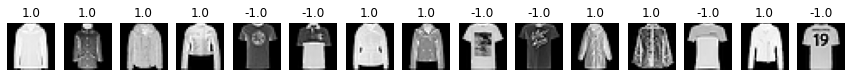

In [4]:
plt.figure(figsize=(15,1))
for k in range(15):
    plt.subplot(1,15,k+1)
    plt.imshow(fashion_img_training[k], cmap="gray")
    plt.title(str(fashion_label_training[k]))
    plt.axis("off")

In [5]:
fashion_img_training.reshape(10000, 28*28).shape

(10000, 784)

**Training the model**

---

The labels  +1  and  −1  correspond to whether a cloth has long or short sleeves. Implement a logistic regression on the training dataset and train it with a basic gradient descent algorithm. Evaluate the accuracy of your model on the test dataset.

**Print out the dimensions of training and test sets**

In [6]:
fashion_img_training.shape

(10000, 28, 28)

In [7]:
fashion_img_val.shape 

(2000, 28, 28)

In [8]:
fashion_label_training.shape

(10000,)

In [9]:
fashion_label_val.shape

(2000,)

**Creating Training and Validation Dataset**

In [10]:
# x_train and x_val contains all the flattened 
# images 
x_train = fashion_img_training.reshape(10000,28*28)
y_train = fashion_label_training
x_val = fashion_img_val.reshape(2000,28*28)
y_val = fashion_label_val 

In [48]:
# Parameter for logistic regression 
beta = np.random.normal(0,1,size = (28*28))

In [60]:
np.dot(beta,x_train[0]) # quite large 

-8.892456479170065

In [ ]:
# should scale the standard deviation based on size 
# to prevent inner product between beta and examples to be large 
beta = np.random.normal(0,scale = 1/np.sqrt(28*28),size = (28*28))

The logistic model is as follows 
\begin{equation*}
P(Y=1|x) = \frac{1}{1+e^{-\langle \beta,x\rangle}}
\end{equation*}

In [12]:
def prediction(x,beta):
  return 1/(1 + jnp.exp(-jnp.dot(beta,x)))

In [13]:
prediction(x_train[0],beta)

DeviceArray(0.9999988, dtype=float32)

**Logistic Loss $\frac{1}{n}\sum_{i=1}^{n}\log(1 + \exp(-y_{i}\langle \beta,x_{i}\rangle)$**

In [14]:
@jax.jit
def loss_single(beta,x,y):
  return jnp.log(1 + jnp.exp(-y * jnp.dot(x,beta)))

**Logistic Loss at a single image**

In [49]:
loss_single(beta,x_train[0],y_train[0])

DeviceArray(8.89259, dtype=float32)

In [16]:
def logistic_loss(beta,x,y):
  N = x.shape[0]
  loss = 0 
  for i in range(N):
    loss += loss_single(beta,x[i],y[i])
  
  loss = 1/N * loss 

  return loss 

In [50]:
logistic_loss(beta,x_train,y_train)

DeviceArray(3.2318602, dtype=float32)

**vmap function to apply loss function to all images to avoid for loop**

In [18]:
def func(x):
  return jnp.mean(x**2)

In [19]:
x_array = jnp.array([1.0,2.0,3.0,4.0,5.0])
func_vmapped = jax.vmap(func)
print(func_vmapped(x_array))

[ 1.  4.  9. 16. 25.]


In [20]:
x_train.shape

(10000, 784)

In [21]:
y_train.shape 

(10000,)

In [22]:
# Do not parallize along beta 
# x parellize along the axes 0 
# y parellize along the axis 0
vmapped_logistic_loss = jax.vmap(loss_single,in_axes = (None,0,0))

In [51]:
vmapped_logistic_loss(beta,x_train,y_train)

DeviceArray([8.8925972e+00, 6.4378512e-01, 6.4623566e+00, ...,
             1.4264875e-02, 1.9073468e-06, 8.2777452e+00], dtype=float32)

In [28]:
@jax.jit
def v_logistic_loss(beta,x,y):
  return jnp.mean(vmapped_logistic_loss(beta,x,y))

loss_value_and_grad =  jax.value_and_grad(v_logistic_loss)

In [52]:
v_logistic_loss(beta,x_train,y_train)

DeviceArray(3.231863, dtype=float32)

**Fit the model with gradient descent**

In [53]:
# find beta that minimizes logistic using gradient descent 
iters = 100 
learning_rate = 0.01 
history = []
beta0 = beta 

for i in range(iters):
  value,gradient = loss_value_and_grad(beta0,x_train,y_train)
  beta0 -= gradient * learning_rate 
  history.append(value)

Text(0, 0.5, 'Objective Value')

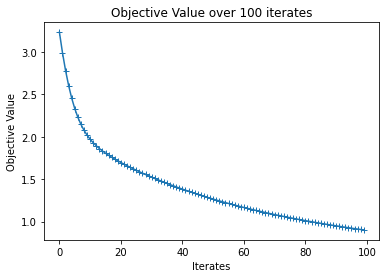

In [54]:
plt.plot(history,"-+")
plt.title("Objective Value over 100 iterates")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

**Computing accuracy of model against validation set**

In [55]:
prediction_vmapped = jax.vmap(prediction,(0,None))

**Training Misclassification Rate**

In [56]:
# True False prediction 
Y_predictions = prediction_vmapped(x_train,beta0) > 0.5 
print(Y_predictions)
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
print(Y_predictions) 

[ True  True  True ... False False  True]
[ 1  1  1 ... -1 -1  1]


In [57]:
jnp.mean(Y_predictions == y_train)

DeviceArray(0.73789996, dtype=float32)

**Test Misclassification Rate**

In [58]:
y_predict = prediction_vmapped(x_val,beta0) > 0.5 
y_predict = 2*y_predict -1 
print(y_predict)

[-1  1  1 ...  1 -1  1]


In [59]:
jnp.mean(y_predict == y_val)

DeviceArray(0.74450004, dtype=float32)